In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries loaded successfully!")
print("Scikit-learn version:", __import__('sklearn').__version__)

Libraries loaded successfully!
Scikit-learn version: 1.8.0


In [3]:
df = pd.read_csv('../data/Exoplanet_Dataset.csv')

print("="*80)
print("STAGE 1: MASS PREDICTION - DATA PREPARATION")
print("="*80)

stage1_features = ['radius', 'orbital_period', 'star_mass']
stage1_target = 'mass'

stage1_cols = stage1_features + [stage1_target]
df_stage1 = df[stage1_cols].dropna()

print(f"\nOriginal dataset: {len(df)} rows")
print(f"Stage 1 available data: {len(df_stage1)} rows")
print(f"\nFeatures: {stage1_features}")
print(f"Target: {stage1_target}")

print("\nFirst 5 rows of Stage 1 data:")
df_stage1.head()

STAGE 1: MASS PREDICTION - DATA PREPARATION

Original dataset: 5986 rows
Stage 1 available data: 1521 rows

Features: ['radius', 'orbital_period', 'star_mass']
Target: mass

First 5 rows of Stage 1 data:


,radius,orbital_period,star_mass,mass
0,1.1520,1075.400000,1.13,5.74300
28,1.1100,10260.000000,1.75,4.10000
29,1.9000,4.230800,1.03,0.47000
34,0.1737,0.736548,0.90,0.02703
53,1.3000,8875.000000,1.20,3.75000


In [4]:
print("="*80)
print("STAGE 1 DATA STATISTICS")
print("="*80)

print("\nFeature Statistics:")
print(df_stage1[stage1_features].describe())

print("\nTarget Statistics:")
print(df_stage1[stage1_target].describe())

print(f"\nDataset shape: {df_stage1.shape}")
print(f"Features: {df_stage1.shape[1] - 1}")
print(f"Samples: {df_stage1.shape[0]}")

STAGE 1 DATA STATISTICS

Feature Statistics:
            radius  orbital_period    star_mass
count  1521.000000    1.521000e+03  1521.000000
mean      0.702337    5.583841e+03     0.960060
std       0.548382    2.061013e+05     0.323457
min       0.026000    6.655134e-02     0.015400
25%       0.211000    3.119063e+00     0.784000
50%       0.554000    5.095717e+00     0.980000
75%       1.160000    1.272070e+01     1.148000
max       6.900000    8.035500e+06     2.520000

Target Statistics:
count    1521.000000
mean        0.880474
std         1.715248
min         0.000190
25%         0.024070
50%         0.168000
75%         0.941000
max        12.900000
Name: mass, dtype: float64

Dataset shape: (1521, 4)
Features: 3
Samples: 1521


In [5]:
X = df_stage1[stage1_features]
y = df_stage1[stage1_target]

# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("="*80)
print("TRAIN/TEST SPLIT (80/20)")
print("="*80)
print(f"\nTraining set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print("\nTraining set shape:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")

print("\nTest set shape:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

TRAIN/TEST SPLIT (80/20)

Training set: 1216 samples (79.9%)
Test set: 305 samples (20.1%)

Training set shape:
  X_train: (1216, 3)
  y_train: (1216,)

Test set shape:
  X_test: (305, 3)
  y_test: (305,)


In [6]:
print("="*80)
print("MODEL 1: LINEAR REGRESSION (BASELINE)")
print("="*80)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)


lr_train_mae = mean_absolute_error(y_train, y_pred_lr_train)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
lr_train_r2 = r2_score(y_train, y_pred_lr_train)


lr_test_mae = mean_absolute_error(y_test, y_pred_lr_test)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
lr_test_r2 = r2_score(y_test, y_pred_lr_test)

print("\nTraining Set Performance:")
print(f"  MAE:  {lr_train_mae:.4f}")
print(f"  RMSE: {lr_train_rmse:.4f}")
print(f"  R²:   {lr_train_r2:.4f}")

print("\nTest Set Performance:")
print(f"  MAE:  {lr_test_mae:.4f}")
print(f"  RMSE: {lr_test_rmse:.4f}")
print(f"  R²:   {lr_test_r2:.4f}")


print("\nFeature Coefficients:")
for feature, coef in zip(stage1_features, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"  Intercept: {lr_model.intercept_:.6f}")

MODEL 1: LINEAR REGRESSION (BASELINE)

Training Set Performance:
  MAE:  0.8695
  RMSE: 1.5662
  R²:   0.2174

Test Set Performance:
  MAE:  0.8025
  RMSE: 1.4064
  R²:   0.0755

Feature Coefficients:
  radius: 0.930937
  orbital_period: 0.000001
  star_mass: 1.182314
  Intercept: -0.893370


In [7]:
print("="*80)
print("MODEL 2: RANDOM FOREST")
print("="*80)

# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)


y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)


rf_train_mae = mean_absolute_error(y_train, y_pred_rf_train)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
rf_train_r2 = r2_score(y_train, y_pred_rf_train)


rf_test_mae = mean_absolute_error(y_test, y_pred_rf_test)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
rf_test_r2 = r2_score(y_test, y_pred_rf_test)

print("\nTraining Set Performance:")
print(f"  MAE:  {rf_train_mae:.4f}")
print(f"  RMSE: {rf_train_rmse:.4f}")
print(f"  R²:   {rf_train_r2:.4f}")

print("\nTest Set Performance:")
print(f"  MAE:  {rf_test_mae:.4f}")
print(f"  RMSE: {rf_test_rmse:.4f}")
print(f"  R²:   {rf_test_r2:.4f}")


print("\nFeature Importance:")
for feature, importance in zip(stage1_features, rf_model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")

MODEL 2: RANDOM FOREST

Training Set Performance:
  MAE:  0.2557
  RMSE: 0.5540
  R²:   0.9021

Test Set Performance:
  MAE:  0.7282
  RMSE: 1.5129
  R²:   -0.0698

Feature Importance:
  radius: 0.4061
  orbital_period: 0.3224
  star_mass: 0.2715


In [8]:
print("="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Train_MAE': [lr_train_mae, rf_train_mae],
    'Test_MAE': [lr_test_mae, rf_test_mae],
    'Train_RMSE': [lr_train_rmse, rf_train_rmse],
    'Test_RMSE': [lr_test_rmse, rf_test_rmse],
    'Train_R2': [lr_train_r2, rf_train_r2],
    'Test_R2': [lr_test_r2, rf_test_r2]
})

print("\n", comparison.to_string(index=False))


best_model_name = 'Random Forest' if rf_test_r2 > lr_test_r2 else 'Linear Regression'
print(f"\nBest model (by Test R²): {best_model_name}")

# Check for overfitting
print("\nOverfitting Check:")
lr_overfit = lr_train_r2 - lr_test_r2
rf_overfit = rf_train_r2 - rf_test_r2
print(f"  Linear Regression: {lr_overfit:.4f} (Train R² - Test R²)")
print(f"  Random Forest: {rf_overfit:.4f} (Train R² - Test R²)")
if rf_overfit > 0.1:
    print("  Random Forest shows signs of overfitting")
else:
    print("  No significant overfitting detected")

MODEL COMPARISON SUMMARY

             Model  Train_MAE  Test_MAE  Train_RMSE  Test_RMSE  Train_R2   Test_R2
Linear Regression   0.869503  0.802546    1.566157   1.406445  0.217441  0.075507
    Random Forest   0.255749  0.728242    0.554029   1.512928  0.902071 -0.069781

Best model (by Test R²): Linear Regression

Overfitting Check:
  Linear Regression: 0.1419 (Train R² - Test R²)
  Random Forest: 0.9719 (Train R² - Test R²)
  Random Forest shows signs of overfitting


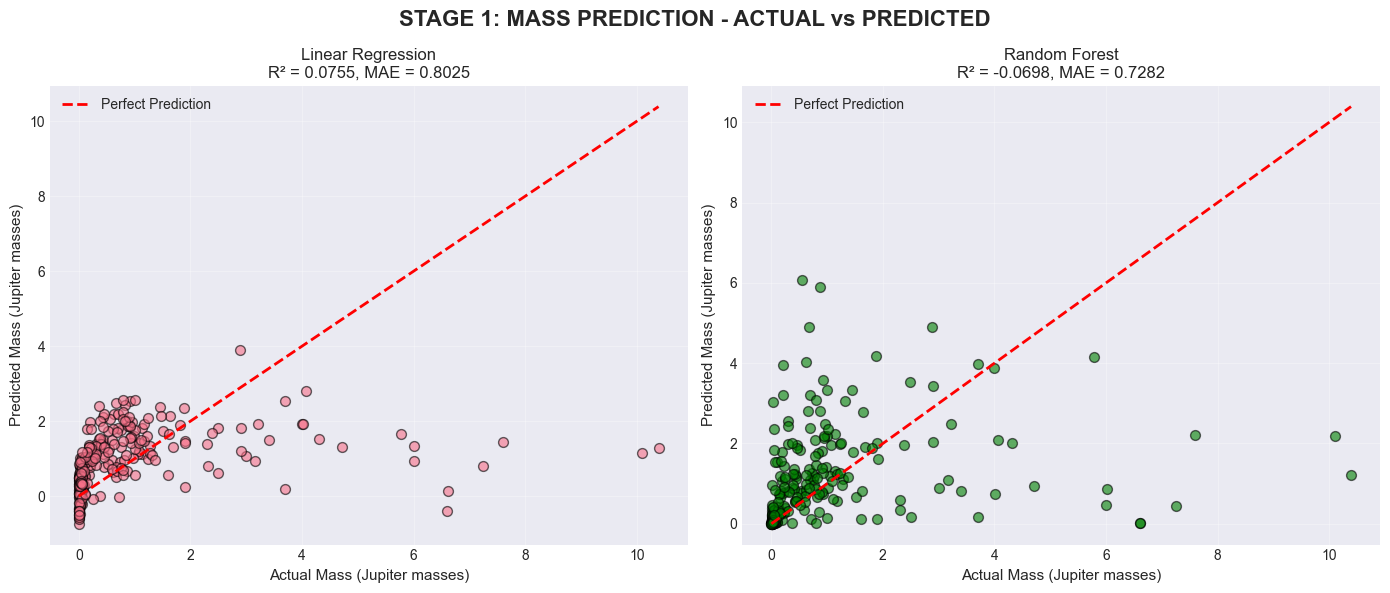

Figure saved: ../outputs/figures/stage1_predictions.png


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('STAGE 1: MASS PREDICTION - ACTUAL vs PREDICTED', fontsize=16, fontweight='bold')

# Linear Regression
ax1 = axes[0]
ax1.scatter(y_test, y_pred_lr_test, alpha=0.6, edgecolors='k', s=50)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Mass (Jupiter masses)', fontsize=11)
ax1.set_ylabel('Predicted Mass (Jupiter masses)', fontsize=11)
ax1.set_title(f'Linear Regression\nR² = {lr_test_r2:.4f}, MAE = {lr_test_mae:.4f}', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Random Forest
ax2 = axes[1]
ax2.scatter(y_test, y_pred_rf_test, alpha=0.6, edgecolors='k', s=50, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Mass (Jupiter masses)', fontsize=11)
ax2.set_ylabel('Predicted Mass (Jupiter masses)', fontsize=11)
ax2.set_title(f'Random Forest\nR² = {rf_test_r2:.4f}, MAE = {rf_test_mae:.4f}', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/stage1_predictions.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved: ../outputs/figures/stage1_predictions.png")

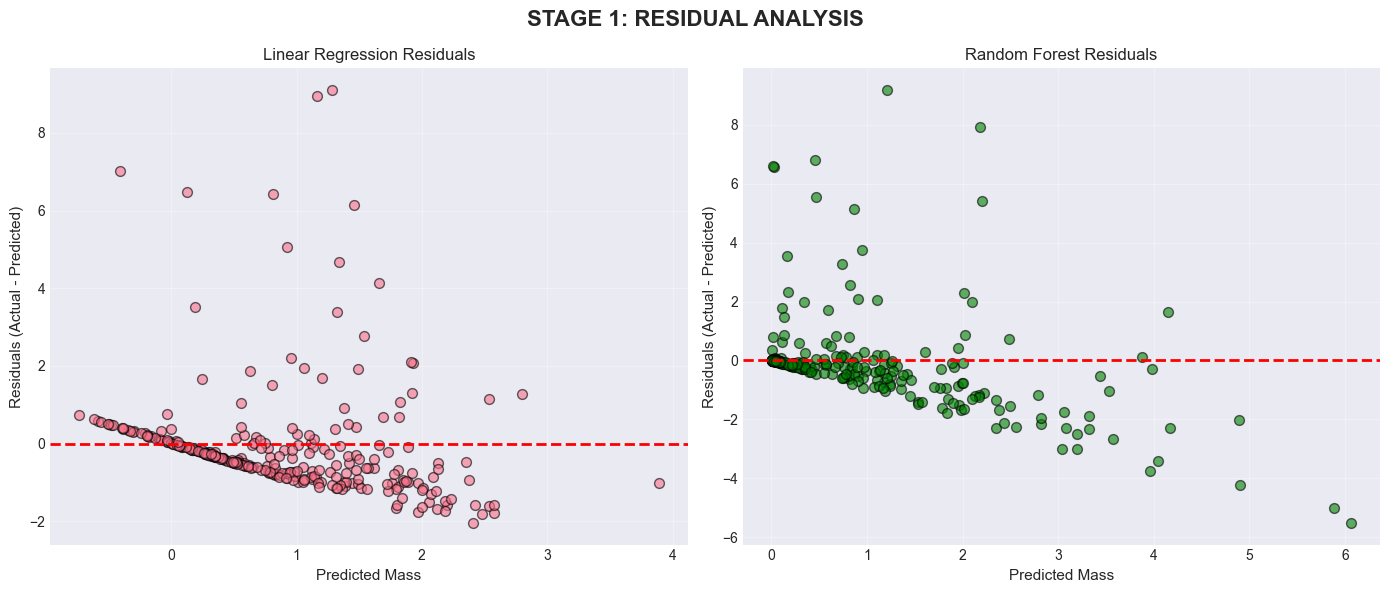

Figure saved: ../outputs/figures/stage1_residuals.png


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('STAGE 1: RESIDUAL ANALYSIS', fontsize=16, fontweight='bold')

# Calculate residuals
lr_residuals = y_test - y_pred_lr_test
rf_residuals = y_test - y_pred_rf_test

# Linear Regression residuals
ax1 = axes[0]
ax1.scatter(y_pred_lr_test, lr_residuals, alpha=0.6, edgecolors='k', s=50)
ax1.axhline(y=0, color='r', linestyle='--', lw=2)
ax1.set_xlabel('Predicted Mass', fontsize=11)
ax1.set_ylabel('Residuals (Actual - Predicted)', fontsize=11)
ax1.set_title('Linear Regression Residuals', fontsize=12)
ax1.grid(True, alpha=0.3)

# Random Forest residuals
ax2 = axes[1]
ax2.scatter(y_pred_rf_test, rf_residuals, alpha=0.6, edgecolors='k', s=50, color='green')
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted Mass', fontsize=11)
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=11)
ax2.set_title('Random Forest Residuals', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/figures/stage1_residuals.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved: ../outputs/figures/stage1_residuals.png")

In [11]:
import joblib

joblib.dump(lr_model, '../models/stage1_linear_regression.pkl')
joblib.dump(rf_model, '../models/stage1_random_forest.pkl')

print("="*80)
print("MODELS SAVED")
print("="*80)
print("\nLinear Regression saved: ../models/stage1_linear_regression.pkl")
print("Random Forest saved: ../models/stage1_random_forest.pkl")


predictions_df = pd.DataFrame({
    'actual': y_test.values,
    'lr_predicted': y_pred_lr_test,
    'rf_predicted': y_pred_rf_test
})
predictions_df.to_csv('../outputs/stage1_predictions.csv', index=False)
print("Predictions saved: ../outputs/stage1_predictions.csv")

MODELS SAVED

Linear Regression saved: ../models/stage1_linear_regression.pkl
Random Forest saved: ../models/stage1_random_forest.pkl
Predictions saved: ../outputs/stage1_predictions.csv


In [12]:
print("="*80)
print("STAGE 1: MASS PREDICTION - COMPLETE")
print("="*80)

print("\nRESULTS SUMMARY:")
print(f"\nDataset: {len(df_stage1)} samples")
print(f"Training: {len(X_train)} samples")
print(f"Testing: {len(X_test)} samples")

print("\nBEST MODEL: Random Forest" if rf_test_r2 > lr_test_r2 else "\nBEST MODEL: Linear Regression")
print(f"  Test R²: {max(rf_test_r2, lr_test_r2):.4f}")
print(f"  Test MAE: {min(rf_test_mae, lr_test_mae):.4f}")
print(f"  Test RMSE: {min(rf_test_rmse, lr_test_rmse):.4f}")

print("\nCOMPLETED:")
print("  - Data preprocessing")
print("  - Linear Regression baseline")
print("  - Random Forest model")
print("  - Model comparison")
print("  - Models saved")

print("\nNEXT STEP:")
print("  Stage 2: Temperature Prediction")

print("\n" + "="*80)

STAGE 1: MASS PREDICTION - COMPLETE

RESULTS SUMMARY:

Dataset: 1521 samples
Training: 1216 samples
Testing: 305 samples

BEST MODEL: Linear Regression
  Test R²: 0.0755
  Test MAE: 0.7282
  Test RMSE: 1.4064

COMPLETED:
  - Data preprocessing
  - Linear Regression baseline
  - Random Forest model
  - Model comparison
  - Models saved

NEXT STEP:
  Stage 2: Temperature Prediction



In [ ]:
print("="*80)
print("RANDOM FOREST - TUNED PARAMETERS TEST")
print("="*80)

# Tuned Random Forest
rf_tuned = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Train
rf_tuned.fit(X_train, y_train)

# Predict
y_pred_rf_tuned_train = rf_tuned.predict(X_train)
y_pred_rf_tuned_test = rf_tuned.predict(X_test)

# Metrics
rf_tuned_train_r2 = r2_score(y_train, y_pred_rf_tuned_train)
rf_tuned_test_r2 = r2_score(y_test, y_pred_rf_tuned_test)
rf_tuned_test_mae = mean_absolute_error(y_test, y_pred_rf_tuned_test)

print(f"\nTuned Random Forest:")
print(f"  Train R²: {rf_tuned_train_r2:.4f}")
print(f"  Test R²: {rf_tuned_test_r2:.4f}")
print(f"  Test MAE: {rf_tuned_test_mae:.4f}")
print(f"  Overfitting: {rf_tuned_train_r2 - rf_tuned_test_r2:.4f}")

print(f"\nComparison:")
print(f"  Default RF Test R²: {rf_test_r2:.4f}")
print(f"  Tuned RF Test R²: {rf_tuned_test_r2:.4f}")
print(f"  Improvement: {rf_tuned_test_r2 - rf_test_r2:.4f}")

if rf_tuned_test_r2 > 0.3:
    print("\nTuned RF works well! Use this instead.")
elif rf_tuned_test_r2 > lr_test_r2:
    print("\nNote: Better than Linear but still weak. Consider log transform in V2.")
else:
    print("\nStill poor. Stick with Linear Regression for now.")

RANDOM FOREST - TUNED PARAMETERS TEST

Tuned Random Forest:
  Train R²: 0.5961
  Test R²: 0.0597
  Test MAE: 0.6723
  Overfitting: 0.5364

Comparison:
  Default RF Test R²: -0.0698
  Tuned RF Test R²: 0.0597
  Improvement: 0.1295

Still poor. Stick with Linear Regression for now.


In [15]:
print("="*80)
print("STAGE 1: FINAL DECISION")
print("="*80)

print("\nSELECTED MODEL: Linear Regression")
print(f"   Test R²: {lr_test_r2:.4f}")
print(f"   Test MAE: {lr_test_mae:.4f}")
print(f"   Test RMSE: {lr_test_rmse:.4f}")

print("\nMODEL COMPARISON:")
print(f"   Linear Regression: R² = {lr_test_r2:.4f}")
print(f"   RF Default:        R² = {rf_test_r2:.4f}")
print(f"   RF Tuned:          R² = {rf_tuned_test_r2:.4f}")

print("\nREASON:")
print("   Linear Regression is the most stable model")
print("   RF shows overfitting even after tuning")
print("   Low R² is expected due to high skewness (2.4)")

print("\nV2 IMPROVEMENTS:")
print("   [ ] Test log(mass) transform")
print("   [ ] Feature engineering (density)")
print("   [ ] Try Ridge/Lasso regression")

print("\nNEXT: Stage 2 - Temperature Prediction")
print("="*80)

# Save the final model
joblib.dump(lr_model, '../models/stage1_FINAL_model.pkl')
print("\nFinal model saved: ../models/stage1_FINAL_model.pkl")

STAGE 1: FINAL DECISION

SELECTED MODEL: Linear Regression
   Test R²: 0.0755
   Test MAE: 0.8025
   Test RMSE: 1.4064

MODEL COMPARISON:
   Linear Regression: R² = 0.0755
   RF Default:        R² = -0.0698
   RF Tuned:          R² = 0.0597

REASON:
   Linear Regression is the most stable model
   RF shows overfitting even after tuning
   Low R² is expected due to high skewness (2.4)

V2 IMPROVEMENTS:
   [ ] Test log(mass) transform
   [ ] Feature engineering (density)
   [ ] Try Ridge/Lasso regression

NEXT: Stage 2 - Temperature Prediction

Final model saved: ../models/stage1_FINAL_model.pkl
